In [1]:
import pandas as pd


In [3]:
data_test=pd.read_csv("fire_risk_test.csv")
data_train=pd.read_csv("fire_risk_train.csv")

In [4]:
data_test.info()
data_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   temperature_C                60 non-null     float64
 1   humidity_percent             60 non-null     float64
 2   wind_speed_kmph              60 non-null     float64
 3   air_quality_index            60 non-null     float64
 4   vegetation_index             60 non-null     float64
 5   emergency_response_time_min  60 non-null     float64
 6   random_noise                 60 non-null     float64
dtypes: float64(7)
memory usage: 3.4 KB


,temperature_C,humidity_percent,wind_speed_kmph,air_quality_index,vegetation_index,emergency_response_time_min,random_noise
0,28.684219,39.679491,0.562655,74.242403,0.313197,2.884045,-0.089225
1,29.415549,44.846189,0.155674,52.918113,0.436912,3.563191,0.744584
2,25.664848,33.303496,1.400242,60.736317,0.548522,3.026515,1.247811
3,23.676716,44.150362,5.440338,50.130019,0.706796,3.453534,0.666166
4,27.454875,37.493174,1.469756,52.486911,0.570645,3.607346,-0.844279


In [5]:
data_train.info()
data_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   temperature_C                240 non-null    float64
 1   humidity_percent             240 non-null    float64
 2   wind_speed_kmph              240 non-null    float64
 3   air_quality_index            240 non-null    float64
 4   vegetation_index             240 non-null    float64
 5   emergency_response_time_min  240 non-null    float64
 6   fire_risk_score              240 non-null    float64
 7   fire_risk_level              240 non-null    object 
 8   random_noise                 240 non-null    float64
dtypes: float64(8), object(1)
memory usage: 17.0+ KB


,temperature_C,humidity_percent,wind_speed_kmph,air_quality_index,vegetation_index,emergency_response_time_min,fire_risk_score,fire_risk_level,random_noise
0,19.939478,14.613031,3.309713,51.580079,0.882388,2.426881,36.298824,Low,-1.349549
1,18.871172,45.988347,2.928750,54.831865,0.661799,3.573987,41.477312,Medium,-0.042336
2,20.003489,10.000000,1.009550,62.969945,0.348045,2.022868,39.487676,Low,-1.128474
3,17.908171,65.904458,3.521618,52.246847,0.400091,2.932591,43.355859,Medium,0.113624
4,28.292721,30.808170,4.020409,52.858654,0.403075,2.334457,55.468398,Medium,0.264644


In [10]:
print("🔥 Risk level categories:")
print(data_train['fire_risk_level'].value_counts())



🔥 Risk level categories:
fire_risk_level
Medium    152
Low        77
High       11
Name: count, dtype: int64


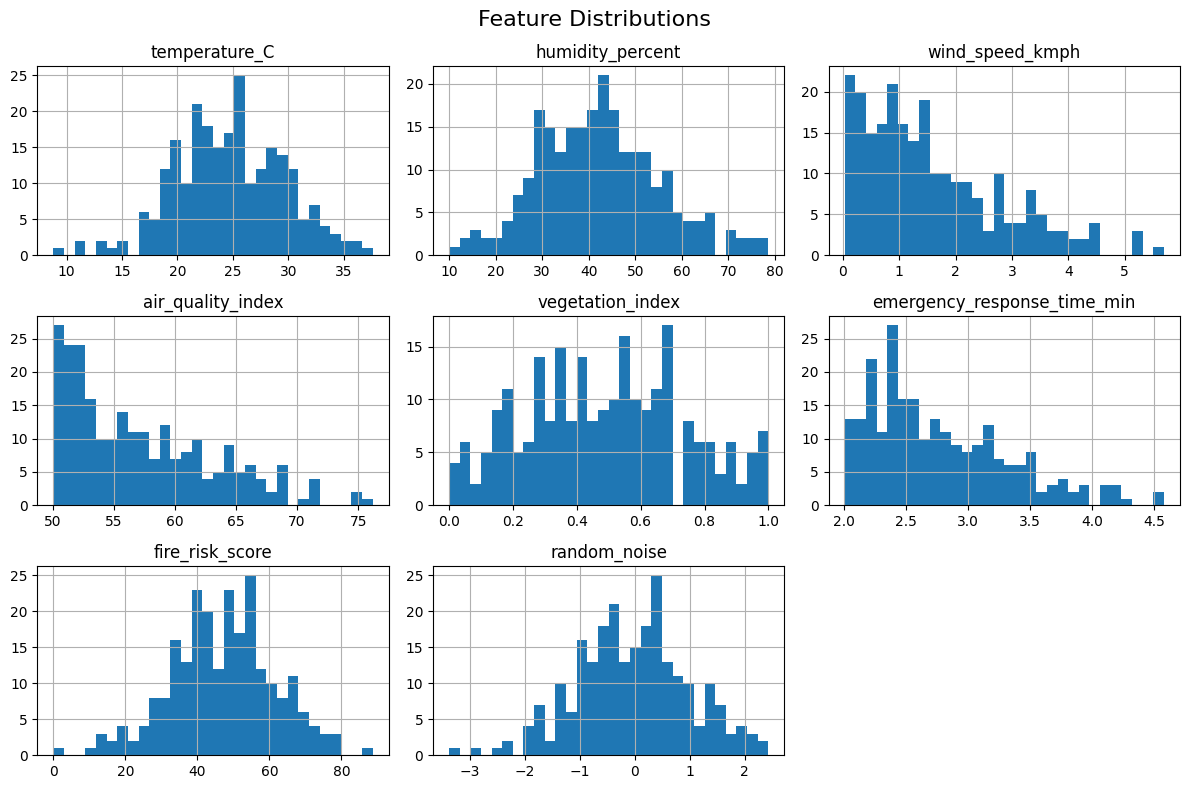

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms of numeric features
data_train.hist(figsize=(12, 8), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()



<Figure size 1000x600 with 0 Axes>

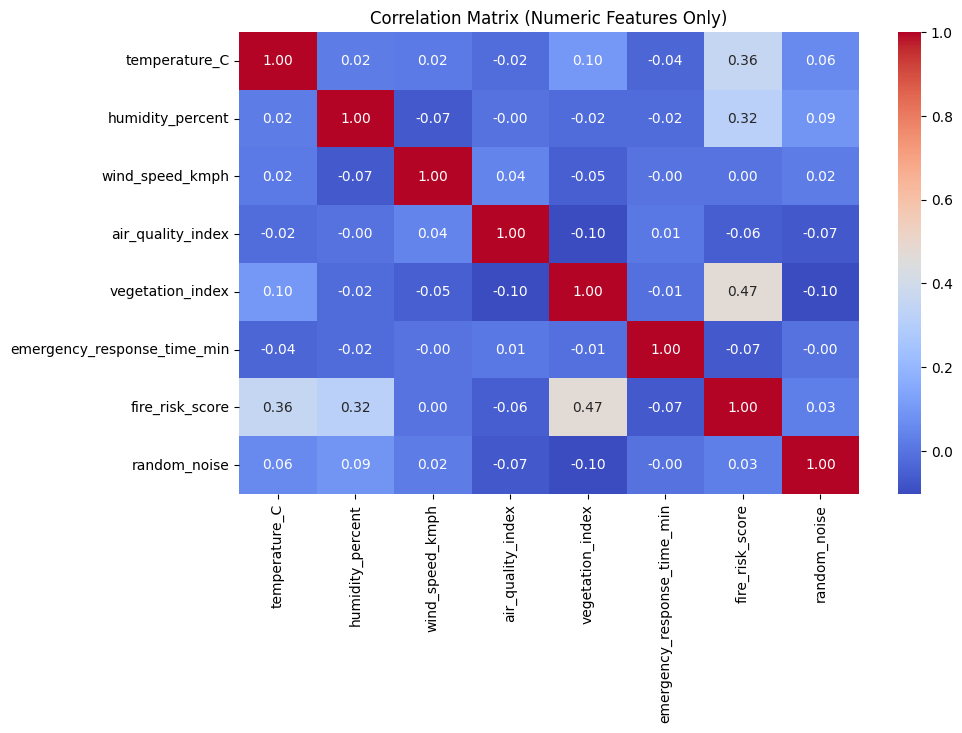

In [13]:
plt.figure(figsize=(10, 6))
# Select only numeric columns
numeric_data = data_train.select_dtypes(include='number')

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Numeric Features Only)")
plt.show()



In [14]:
data_train = data_train.drop(columns=['random_noise'])

In [15]:
X = data_train[['vegetation_index', 'temperature_C', 'humidity_percent']]
y = data_train['fire_risk_score']

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Initialize and train the model
reg = LinearRegression()
reg.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
y_pred = reg.predict(X_test)

In [21]:
import numpy as np

def compute_cost(X, y, w, b):
    m = X.shape[0]
    total_cost = 0

    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        total_cost += (f_wb_i - y[i]) ** 2

    return total_cost / (2 * m)



In [22]:
def compute_gradient(X, y, w, b):
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    for i in range(m):
        err = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] += err * X[i, j]
        dj_db += err

    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db



In [23]:
def gradient_descent(X, y, w_init, b_init, alpha, num_iters, cost_func, grad_func):
    w = w_init.copy()
    b = b_init
    J_history = []

    for i in range(num_iters):
        dj_dw, dj_db = grad_func(X, y, w, b)
        
        # update weights and bias
        w -= alpha * dj_dw
        b -= alpha * dj_db

        # Save cost
        if i % 100 == 0 or i == num_iters - 1:
            cost = cost_func(X, y, w, b)
            J_history.append(cost)
            print(f"Iteration {i}: Cost {cost:.4f}")

    return w, b, J_history

In [24]:
# Normalize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.values)

# Initialize
w_init = np.zeros(X.shape[1])
b_init = 0.
alpha = 0.01
iterations = 1000

# Run Gradient Descent
w_final, b_final, J_hist = gradient_descent(X_scaled, y.values, w_init, b_init, alpha, iterations, compute_cost, compute_gradient)


Iteration 0: Cost 1184.5229
Iteration 100: Cost 209.9918
Iteration 200: Cost 80.0039
Iteration 300: Cost 62.6476
Iteration 400: Cost 60.3280
Iteration 500: Cost 60.0177
Iteration 600: Cost 59.9762
Iteration 700: Cost 59.9706
Iteration 800: Cost 59.9698
Iteration 900: Cost 59.9697
Iteration 999: Cost 59.9697


In [25]:
# Quick look at the range of fire_risk_score
print(data_train['fire_risk_score'].describe())

# View average score per risk level
data_train.groupby('fire_risk_level')['fire_risk_score'].describe()


count    240.000000
mean      46.985133
std       14.425230
min        0.000000
25%       38.086297
50%       47.792465
75%       55.481380
max       88.720877
Name: fire_risk_score, dtype: float64


,count,mean,std,min,25%,50%,75%,max
fire_risk_level,,,,,,,,
High,11.0,76.320239,5.024537,71.106739,72.848160,75.332519,78.355531,88.720877
Low,77.0,30.990448,8.359890,0.000000,27.089659,33.477748,37.515993,39.854864
Medium,152.0,52.964769,7.960610,40.416347,46.847996,52.247209,57.762998,69.848825


In [26]:
def score_to_level(score):
    if score < 34:
        return "Low"
    elif score < 67:
        return "Medium"
    else:
        return "High"


y_pred_labels = [score_to_level(s) for s in y_pred]



In [27]:
from sklearn.preprocessing import LabelEncoder

# Copy data to avoid modifying original
clf_data = data_train.copy()

# Encode the target labels
le = LabelEncoder()
clf_data['fire_risk_level_encoded'] = le.fit_transform(clf_data['fire_risk_level'])

# Check mapping
print(dict(zip(le.classes_, le.transform(le.classes_))))


{'High': 0, 'Low': 1, 'Medium': 2}


In [33]:
X_clf = clf_data.drop(columns=['fire_risk_score', 'fire_risk_level', 'fire_risk_level_encoded','risk_level_mapped'])
y_clf = clf_data['fire_risk_level_encoded']


In [34]:
from sklearn.model_selection import train_test_split

Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)


In [35]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(Xc_train, yc_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [37]:
# Drop noisy column
data_test_clean = data_test.drop(columns=['random_noise'])

# Regression features (same as earlier)
X_test_reg = data_test_clean[['vegetation_index', 'temperature_C', 'humidity_percent']]


In [38]:
fire_risk_score_pred = reg.predict(X_test_reg)


In [ ]:

def convert_score_to_level(score):
    if score < 33:
        return 'Low'
    elif score < 66:
        return 'Medium'
    else:
        return 'High'

fire_risk_level_pred = [convert_score_to_level(score) for score in fire_risk_score_pred]


In [42]:
print(fire_risk_level_pred)

['Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'High', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'High', 'Medium', 'Medium', 'High', 'High', 'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium']


In [43]:
submission = pd.DataFrame({
    'fire_risk_score': fire_risk_score_pred,
    'fire_risk_level': fire_risk_level_pred
})


In [45]:
submission.to_csv("fire_risk_submission.csv", index=False)
print("✅ Submission file saved as fire_risk_submission.csv")

✅ Submission file saved as fire_risk_submission.csv


In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📊 Model Performance:")
print(f"➡️  RMSE: {rmse:.2f}")
print(f"➡️  MAE: {mae:.2f}")
print(f"➡️  R² Score: {r2:.2f}")


📊 Model Performance:
➡️  RMSE: 10.59
➡️  MAE: 9.01
➡️  R² Score: 0.29


C:\Users\User\AppData\Local\Temp\ipykernel_15544\1360058406.py:10: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


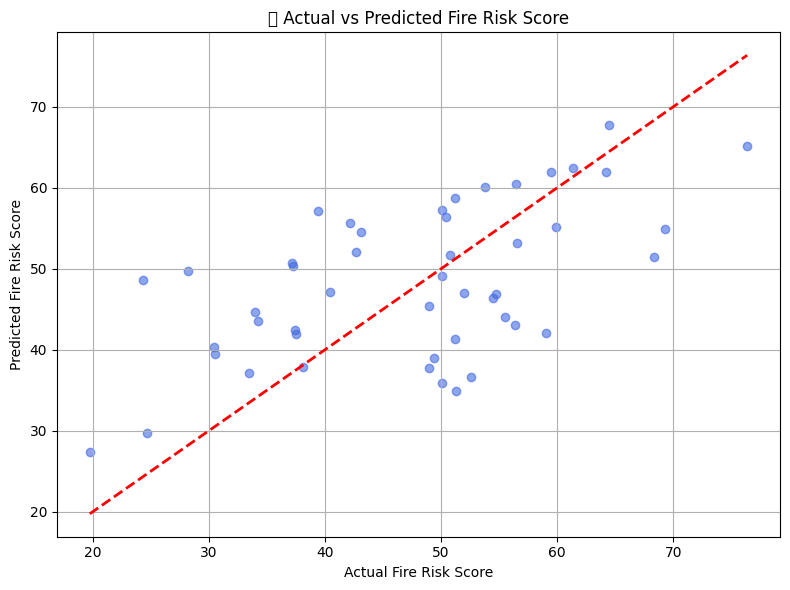

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Fire Risk Score")
plt.ylabel("Predicted Fire Risk Score")
plt.title("🔥 Actual vs Predicted Fire Risk Score")
plt.grid(True)
plt.tight_layout()
plt.show()
